# House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

<img src="housesbanner.png"  align="left" style="width: 600px;"/>

<span style="font-family: Courier New; background-color: #ffcc5c; color: #000000; padding: 3px; ">Performed by:</span> Nicolás D'Alessandro

______

## 00 - Load the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reutils as k
from sklearn.impute import SimpleImputer

____

## 00 - Create required formulas

In [3]:
def nullvaluesf_count(data):
    '''
    This function displays the features that contains null values as well as the correspondig count:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Features with null values and count.
    '''
    print('\033[1m' + 'Top 10 Features with null values:'+ '\033[0m')

    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing__train_data.head(10)
        
    return missing__train_data.head(10)

def describe(data):
    '''
    This function displays a basic description about the numerical features in the given dataset:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Dataset basic description.
    '''
    print('\033[1m' + 'Numerical values description:'+ '\033[0m')
    
    return data.describe().round(2)


def numerical_features_count(dataset):
    '''
    This function returns the count of the numerical features in the given dataset:
    >>> Parameter 1: [DataFrame] Pandas DataFrame.
    ------------------------------------------------
    <<< Return: Numerical features count
    '''
    numerical_features = dataset.describe().transpose().index
    print("We have \033[1m{}\033[0m numerical features in the given dataset: \n".format(len(numerical_features)))

    return print([i for i in dataset.describe().transpose().index])


def numericalFeatures_nullsCount(dataset):
    '''
    This function returns the count an percentage of the total of the numerical features for the given dataset:
    >>> Parameter 1: [DataFrame] Pandas DataFrame.
    ------------------------------------------------
    <<< Return: Count of null values of the numerical features for the given dataset.
    '''    
    numerical_features = dataset.describe().transpose().index
    numerical_features_nulls = []
    for num_feature in numerical_features:
        if dataset[num_feature].isnull().sum() > 0:
            numerical_features_nulls.append(num_feature)

    print("\033[1m Numerical Features with null values:")

    dic_for_df = {}
    for i in numerical_features_nulls:
        dic_for_df[i] = [dataset[i].isnull().sum(), str((dataset[i].isnull().sum()/len(dataset[i])*100).round(2)) +
                        '%']
    df =  pd.DataFrame.from_dict(dic_for_df, orient='index', columns=['null_count', '%']) 
    
    return df.sort_values(by='null_count', ascending=False)

def categorical_features_count(dataset):
    '''
    This function returns the count of the categorical features in the given dataset:
    >>> Parameter 1: [DataFrame] Pandas DataFrame.
    ------------------------------------------------
    <<< Return: Categorical features count
    '''
    categorical_features = dataset.select_dtypes(include= 'object').columns
    print("We have \033[1m{}\033[0m categorical features in the given dataset: \n".
          format(len(categorical_features)))

    return print([i for i in categorical_features])


def categoricalFeatures_nullsCount(dataset):
    '''
    This function returns the count an percentage of the total of the categorical features for the given dataset:
    >>> Parameter 1: [DataFrame] Pandas DataFrame.
    ------------------------------------------------
    <<< Return: Count of null values of the categorical features for the given dataset.
    '''    
    categorical_features = dataset.select_dtypes(include= 'object').columns
    categorical_features_nulls = []
    for num_feature in categorical_features:
        if dataset[num_feature].isnull().sum() > 0:
            categorical_features_nulls.append(num_feature)

    print("\033[1m Categorical Features with null values:")
    
    dic_for_df_cat = {}
    for i in categorical_features_nulls:
        dic_for_df_cat[i] = [dataset[i].isnull().sum(), str((dataset[i].isnull().sum()/len(dataset[i])*100).round(2))
                             +
                        '%']
    df =  pd.DataFrame.from_dict(dic_for_df_cat, orient='index', columns=['null_count', '%']) 
    
    return df.sort_values(by='null_count', ascending=False)

        
def create_boxplot(dataset):
    '''
       This function plot boxplot for each column of the given dataset:
        >>> Parameter 1: [DataFrame] Pandas DataFrame.
        ------------------------------------------------
        <<< Return: Plot.
    
    '''
    fig = plt.figure(figsize=(15,6))
    ax = sns.boxplot(data = dataset)
    plt.xticks(rotation=90)

___

## 01 - Gather Data

In [4]:
#load datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
#create column in order to append both datasets
df_train['is_train'] = 1
df_test['is_train'] = 0

In [6]:
#create an union of the given datasets
df_full = df_train.append(df_test)

In [7]:
#use the kbasics library to clean column names
k.cleanUp_columns(df_full)

In [8]:
#create the "df" dataset narowing down the unnecesary columns to perform EDA + FE
df = df_full.drop(['id','is_train', 'saleprice'], axis=1)

In [9]:
df_full.shape[1]

82

In [10]:
df.shape[1]

79

____

## 02 - Perform EDA on the loaded datasets

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
1stflrsf         2919 non-null int64
2ndflrsf         2919 non-null int64
3ssnporch        2919 non-null int64
alley            198 non-null object
bedroomabvgr     2919 non-null int64
bldgtype         2919 non-null object
bsmtcond         2837 non-null object
bsmtexposure     2837 non-null object
bsmtfinsf1       2918 non-null float64
bsmtfinsf2       2918 non-null float64
bsmtfintype1     2840 non-null object
bsmtfintype2     2839 non-null object
bsmtfullbath     2917 non-null float64
bsmthalfbath     2917 non-null float64
bsmtqual         2838 non-null object
bsmtunfsf        2918 non-null float64
centralair       2919 non-null object
condition1       2919 non-null object
condition2       2919 non-null object
electrical       2918 non-null object
enclosedporch    2919 non-null int64
extercond        2919 non-null object
exterqual        2919 non-null object
exterior1st      291

### 02a- Numerical Features

In [12]:
numerical_features_count(df)

We have 36 numerical features in the given dataset: 

['1stflrsf', '2ndflrsf', '3ssnporch', 'bedroomabvgr', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtfullbath', 'bsmthalfbath', 'bsmtunfsf', 'enclosedporch', 'fireplaces', 'fullbath', 'garagearea', 'garagecars', 'garageyrblt', 'grlivarea', 'halfbath', 'kitchenabvgr', 'lotarea', 'lotfrontage', 'lowqualfinsf', 'mssubclass', 'masvnrarea', 'miscval', 'mosold', 'openporchsf', 'overallcond', 'overallqual', 'poolarea', 'screenporch', 'totrmsabvgrd', 'totalbsmtsf', 'wooddecksf', 'yearbuilt', 'yearremodadd', 'yrsold']


In [13]:
describe(df)

Numerical values description:


,1stflrsf,2ndflrsf,3ssnporch,bedroomabvgr,bsmtfinsf1,bsmtfinsf2,bsmtfullbath,bsmthalfbath,bsmtunfsf,enclosedporch,...,overallcond,overallqual,poolarea,screenporch,totrmsabvgrd,totalbsmtsf,wooddecksf,yearbuilt,yearremodadd,yrsold
count,2919.00,2919.00,2919.00,2919.00,2918.00,2918.00,2917.00,2917.00,2918.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2918.00,2919.00,2919.00,2919.00,2919.00
mean,1159.58,336.48,2.60,2.86,441.42,49.58,0.43,0.06,560.77,23.10,...,5.56,6.09,2.25,16.06,6.45,1051.78,93.71,1971.31,1984.26,2007.79
std,392.36,428.70,25.19,0.82,455.61,169.21,0.52,0.25,439.54,64.24,...,1.11,1.41,35.66,56.18,1.57,440.77,126.53,30.29,20.89,1.31
min,334.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,0.00,2.00,0.00,0.00,1872.00,1950.00,2006.00
25%,876.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,220.00,0.00,...,5.00,5.00,0.00,0.00,5.00,793.00,0.00,1953.50,1965.00,2007.00
50%,1082.00,0.00,0.00,3.00,368.50,0.00,0.00,0.00,467.00,0.00,...,5.00,6.00,0.00,0.00,6.00,989.50,0.00,1973.00,1993.00,2008.00
75%,1387.50,704.00,0.00,3.00,733.00,0.00,1.00,0.00,805.50,0.00,...,6.00,7.00,0.00,0.00,7.00,1302.00,168.00,2001.00,2004.00,2009.00
max,5095.00,2065.00,508.00,8.00,5644.00,1526.00,3.00,2.00,2336.00,1012.00,...,9.00,10.00,800.00,576.00,15.00,6110.00,1424.00,2010.00,2010.00,2010.00


In [14]:
numericalFeatures_nullsCount(df)

 Numerical Features with null values:


,null_count,%
lotfrontage,486,16.65%
garageyrblt,159,5.45%
masvnrarea,23,0.79%
bsmtfullbath,2,0.07%
bsmthalfbath,2,0.07%
bsmtfinsf1,1,0.03%
bsmtfinsf2,1,0.03%
bsmtunfsf,1,0.03%
garagearea,1,0.03%
garagecars,1,0.03%


### 02b - Categorical Features

In [15]:
categorical_features_count(df)

We have 43 categorical features in the given dataset: 

['alley', 'bldgtype', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'bsmtqual', 'centralair', 'condition1', 'condition2', 'electrical', 'extercond', 'exterqual', 'exterior1st', 'exterior2nd', 'fence', 'fireplacequ', 'foundation', 'functional', 'garagecond', 'garagefinish', 'garagequal', 'garagetype', 'heating', 'heatingqc', 'housestyle', 'kitchenqual', 'landcontour', 'landslope', 'lotconfig', 'lotshape', 'mszoning', 'masvnrtype', 'miscfeature', 'neighborhood', 'paveddrive', 'poolqc', 'roofmatl', 'roofstyle', 'salecondition', 'saletype', 'street', 'utilities']


In [16]:
categoricalFeatures_nullsCount(df)

 Categorical Features with null values:


,null_count,%
poolqc,2909,99.66%
miscfeature,2814,96.4%
alley,2721,93.22%
fence,2348,80.44%
fireplacequ,1420,48.65%
garagecond,159,5.45%
garagefinish,159,5.45%
garagequal,159,5.45%
garagetype,157,5.38%
bsmtexposure,82,2.81%


### 02c - Top Features with null values

In [17]:
#top 10 features with na values
df_nulls = nullvaluesf_count(df).transpose()
df_nulls

Top 10 Features with null values:


,poolqc,miscfeature,alley,fence,fireplacequ,lotfrontage,garagefinish,garagequal,garageyrblt,garagecond
Total,2909.000000,2814.000000,2721.000000,2348.000000,1420.000000,486.000000,159.000000,159.000000,159.000000,159.000000
Percent,99.657417,96.402878,93.216855,80.438506,48.646797,16.649538,5.447071,5.447071,5.447071,5.447071


### 02d - Correlation Matrix

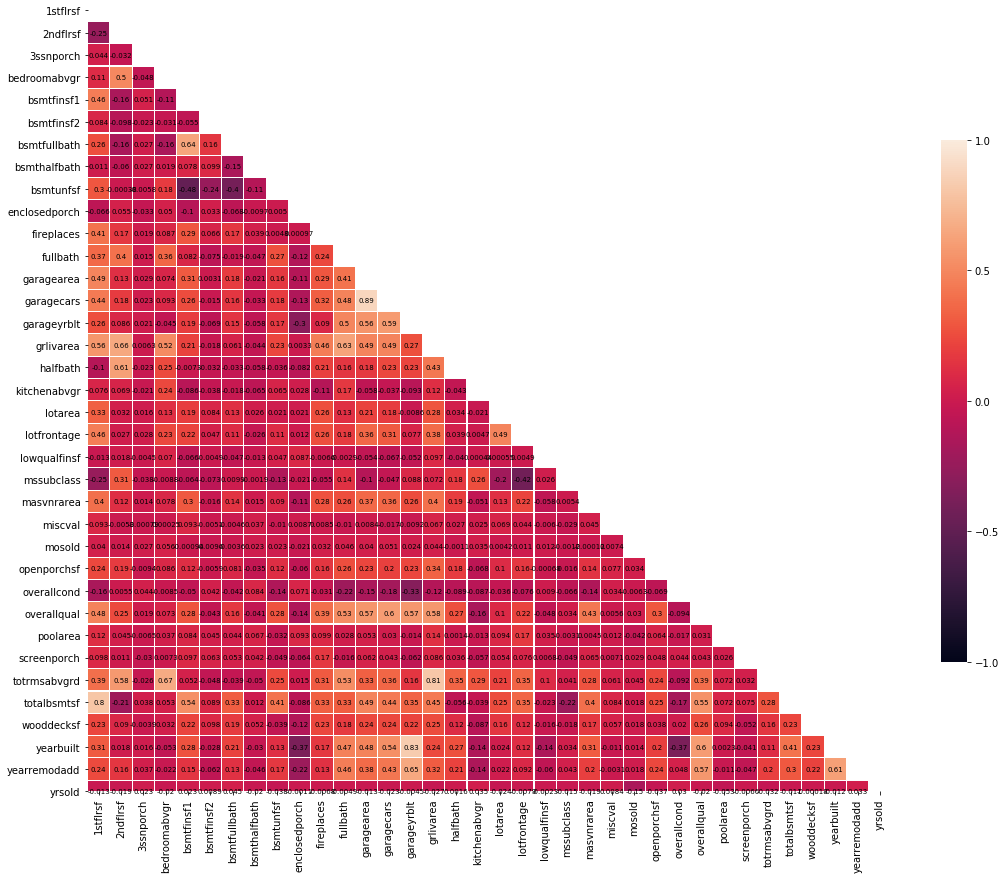

In [18]:
f, ax = plt.subplots(figsize=(18,24))

corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = 0.1,
                      vmin = -1,
                      vmax = 1,
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      annot = True,
                      annot_kws = {'size': 7, 'color': 'black'}
                     )

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': False}, {'ytick.left': False})

### 02e - Target Variable Observation

In [19]:
# Target description
df_full['saleprice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: saleprice, dtype: float64

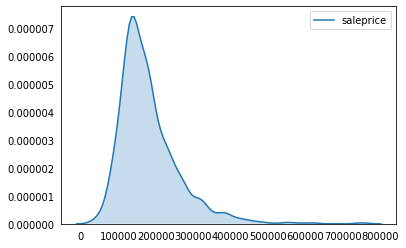

In [20]:
# Target distribution
sns.kdeplot(df_full['saleprice'], shade=True)
plt.show()

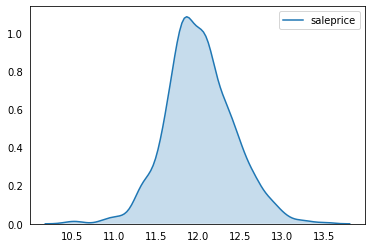

In [21]:
# Logaritmic transformation
sns.kdeplot(np.log(df_full['saleprice']), shade=True)
plt.show()

In [22]:
# regarding the observation we apply the log transformation to our target variable
df_full['saleprice'] = np.log(df_full['saleprice'])

____

## 03 - Na values Imputation

### 03a - Remove columns with more than 40% of null values

In [23]:
#remove columns with more than 40% of null values
columns_to_erase = df_nulls.columns[df_nulls.loc['Percent'] > 40]
df_full.drop(columns_to_erase, axis=1, inplace=True)
print(f'Erased columns: {[i for i in columns_to_erase]}')

Erased columns: ['poolqc', 'miscfeature', 'alley', 'fence', 'fireplacequ']


### 03b - Fill Na values (Numerical Features)

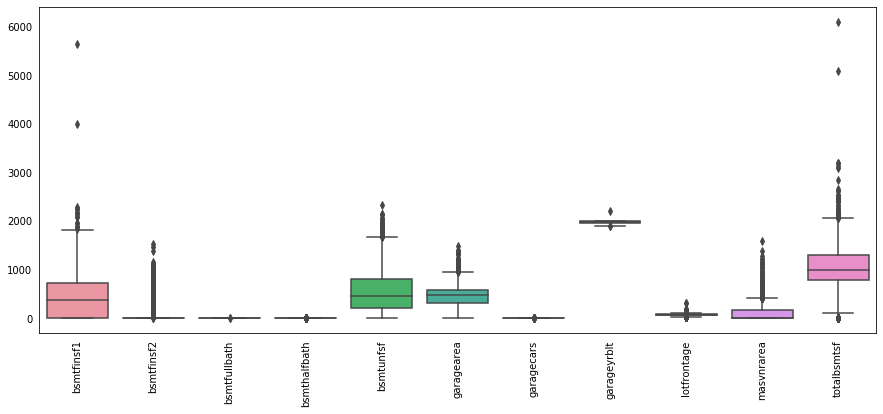

In [24]:
#observe Numerical values with null values
create_boxplot(df[[i for i in df.columns if df[i].isnull().sum() > 0]])

In [25]:
# Regarding outliers we'd rather select some columns to fillna with "median"
df_num_null = df[df.describe().transpose().index].isnull().sum() > 0
df_num_null = df_num_null[df_num_null.values == True].index
df_full[df_num_null] = df_full[df_num_null].fillna(df_full[df_num_null].median())

In [26]:
# Get list of numerical variables
s = (df_full.dtypes != 'object')
num_cols = list(s[s].index)

In [27]:
# Check Na values
df_full[num_cols].drop(columns='saleprice').isna().any().sum()

0

### 03c - Fill Na values (Categorical Features)

In [28]:
# Get list of categorical variables
s = (df_full.dtypes == 'object')
object_cols = list(s[s].index)

# Remove numerical columns
cat_df_full = df_full.drop(num_cols, axis=1)

# Imputation
my_imputer = SimpleImputer(strategy="constant",fill_value="non")
imputed_cat_df_full = pd.DataFrame(my_imputer.fit_transform(cat_df_full))

# Imputation removed column names, put them back
df_full[object_cols] = imputed_cat_df_full = pd.DataFrame(my_imputer.fit_transform(cat_df_full))

In [29]:
# Check Na values
df_full[object_cols].isna().any().sum()

0

___

### 04 - Export dataset for future usage

In [30]:
df_full.to_csv('full.csv',index=False)

____